# GROUP 6:
1. GROUP MEMBERS:
    Karthik Adepu,
    Mahesh Gummala,
    Sai chandu Kotturu,
    Sowjanya Rangannagari,
    Mounika Sannikanti,
    Sruthi Teepireddy
   

In [1]:
from bs4 import BeautifulSoup
import requests

SCRAPING USING BEAUTIFULSOUP

In [2]:
url = 'https://en.wikipedia.org/wiki/Fortune_500'

page = requests.get(url)
soup =BeautifulSoup(page.text,'html')

In [3]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Fortune 500 - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [4]:
soup.find('table') #Finding all tables using soup

<table class="wikitable sortable plainrowheaders">
<caption><i>Fortune</i> 500 list of 2024
</caption>
<tbody><tr>
<th scope="col">Rank
</th>
<th scope="col">Company
</th>
<th scope="col">State
</th>
<th scope="col">Industry
</th>
<th scope="col">Revenue in USD
</th></tr>
<tr>
<th scope="row">1
</th>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="300" data-file-width="450" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Arkansas.svg/40px-Flag_of_Arkansas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Arkansas.svg/60px-Flag_of_Arkansas.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Arkansas" title="Arkansas">Arkansas</a>
</td>
<td>General merchandisers
</td>
<td>$648.1 billion
</td></tr>
<tr>
<th scope="row">2
</th>
<td><a href="/wiki/Amazon_(company)"

In [5]:
# Fetching my required table with table class name 
table = soup.find('table', {'class': 'wikitable sortable plainrowheaders'})

In [6]:
#putting all the titles of tables into headers
header_row = table.find('tr')
headers = [th.get_text(strip=True) for th in header_row.find_all('th')]

In [7]:
header_row = table.find('tr')
headers = [th.get_text(strip=True) for th in header_row.find_all('th')]

print(headers)

['Rank', 'Company', 'State', 'Industry', 'Revenue in USD']


In [8]:
#Putting the headers into dataframe
import pandas as pd
df=pd.DataFrame(columns = headers)
df

,Rank,Company,State,Industry,Revenue in USD


In [9]:
rows = table.find_all('tr')
all_data = []
for row in rows[1:]:   # skip the header row
    cells = row.find_all(['td', 'th'])  # use both 'td' and 'th'
    if len(cells) == 5:  # expecting 5 columns: Rank, Company, State, Industry, Revenue
        row_data = [cell.get_text(strip=True) for cell in cells]
        all_data.append(row_data)

In [10]:
for i in all_data:
    print(i)

['1', 'Walmart', 'Arkansas', 'General merchandisers', '$648.1 billion']
['2', 'Amazon', 'Washington', 'Internet services and retailing', '$574.8 billion']
['3', 'Apple', 'California', 'Computers, office equipment', '$383.3 billion']
['4', 'UnitedHealth Group', 'Minnesota', 'Health care: insurance and managed care', '$371.6 billion']
['5', 'Berkshire Hathaway', 'Nebraska', 'Insurance: property and casualty (stock)', '$364.5 billion']
['6', 'CVS Health', 'Rhode Island', 'Health care: pharmacy and other services', '$357.8 billion']
['7', 'ExxonMobil', 'Texas', 'Petroleum refining', '$344.6 billion']
['8', 'Alphabet Inc.', 'California', 'Internet services and retailing', '$307.4 billion']
['9', 'McKesson Corporation', 'Texas', 'Wholesalers: health care', '$276.7 billion']
['10', 'Cencora', 'Pennsylvania', 'Wholesalers: health care', '$262.2 billion']
['11', 'Costco', 'Washington', 'General merchandisers', '$242.3 billion']
['12', 'JPMorgan Chase', 'New York', 'Commercial banks', '$239.4 bi

In [11]:
#Putting all the rows into table
for row in all_data:
    df.loc[len(df)] = row

In [12]:
# Dropping duplicate rows
df = df.drop_duplicates()
# Resetting index
df = df.reset_index(drop=True)
#Set index to start from 1 instead of 0 to avoid confusion
df.index = df.index + 1
df

,Rank,Company,State,Industry,Revenue in USD
1,1,Walmart,Arkansas,General merchandisers,$648.1 billion
2,2,Amazon,Washington,Internet services and retailing,$574.8 billion
3,3,Apple,California,"Computers, office equipment",$383.3 billion
4,4,UnitedHealth Group,Minnesota,Health care: insurance and managed care,$371.6 billion
5,5,Berkshire Hathaway,Nebraska,Insurance: property and casualty (stock),$364.5 billion
6,6,CVS Health,Rhode Island,Health care: pharmacy and other services,$357.8 billion
7,7,ExxonMobil,Texas,Petroleum refining,$344.6 billion
8,8,Alphabet Inc.,California,Internet services and retailing,$307.4 billion
9,9,McKesson Corporation,Texas,Wholesalers: health care,$276.7 billion
10,10,Cencora,Pennsylvania,Wholesalers: health care,$262.2 billion


In [13]:
#Converting dataframe to csv 
df.to_csv(r'Fortune500.csv',index=False)

Data visualizations

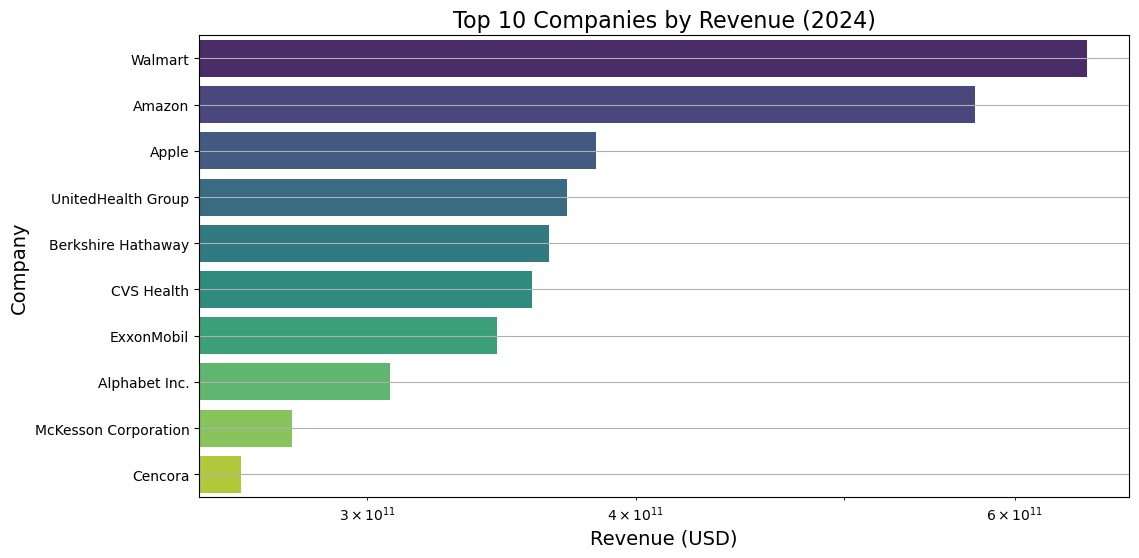

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Make Revenue numeric (remove $ and billion)
df['Revenue in USD'] = df['Revenue in USD'].replace({'\$':'', ' billion':''}, regex=True).astype(float) * 1e9

#Plotting to find Top 10 Companies by Revenue
top10 = df.sort_values('Revenue in USD', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue in USD', y='Company', data=top10, palette='viridis')
plt.title('Top 10 Companies by Revenue (2024)', fontsize=16)
plt.xlabel('Revenue (USD)', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.xscale('log')  # Because numbers are huge
plt.grid(True)
plt.show()

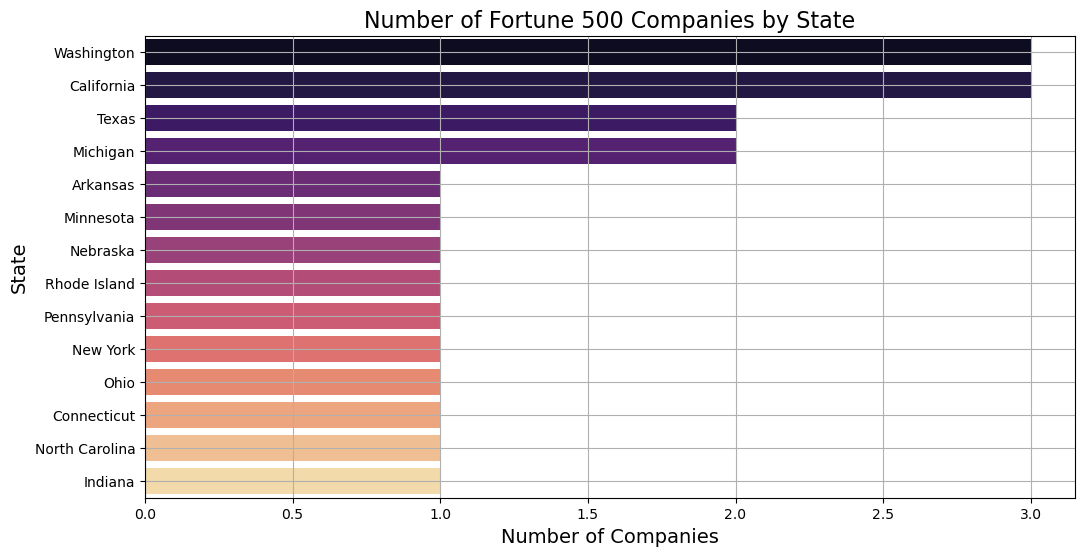

In [15]:
# plottimg the Companies Count by State
plt.figure(figsize=(12,6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='magma')
plt.title('Number of Fortune 500 Companies by State', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.grid(True)
plt.show()


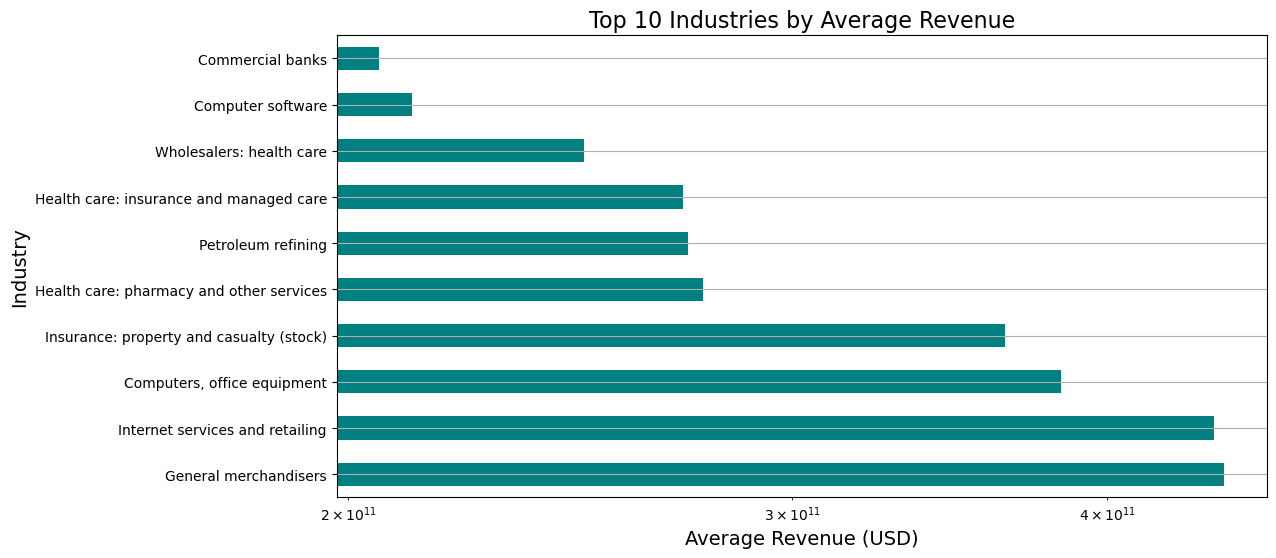

In [16]:
#Average Revenue per Industry
industry_revenue = df.groupby('Industry')['Revenue in USD'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
industry_revenue.plot(kind='barh', color='teal')
plt.title('Top 10 Industries by Average Revenue', fontsize=16)
plt.xlabel('Average Revenue (USD)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xscale('log')
plt.grid(True)
plt.show()

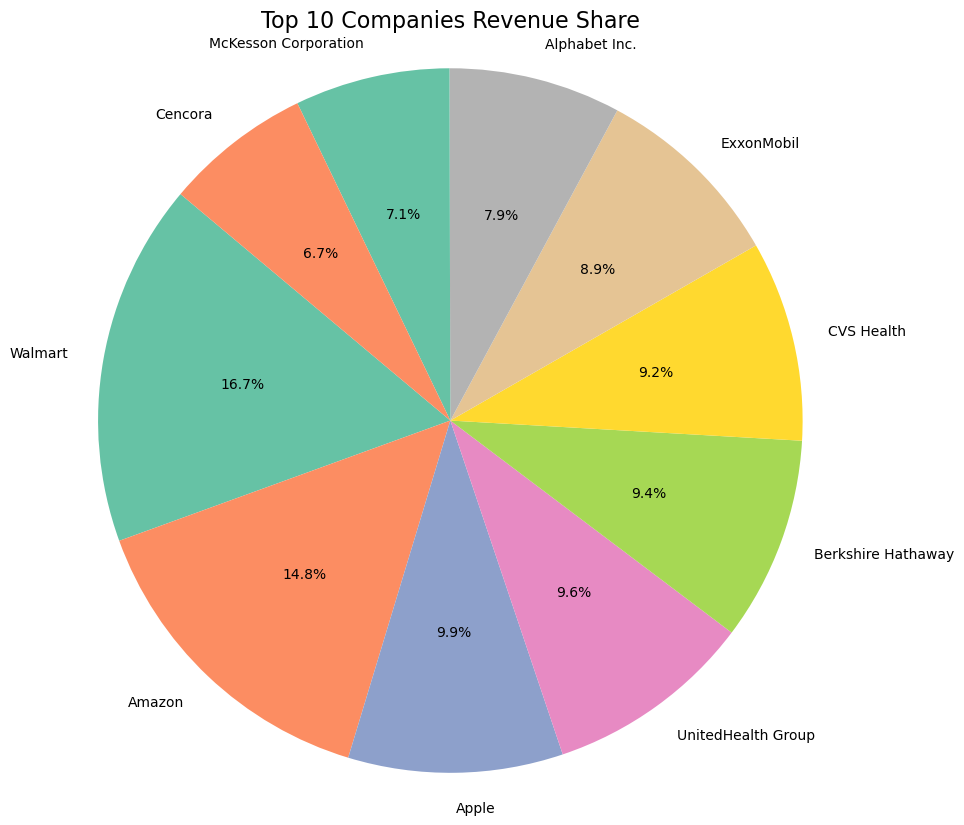

In [17]:
import numpy as np
# Pie Chart - Revenue Share of Top 10 Companies
top10 = df.sort_values('Revenue in USD', ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.pie(top10['Revenue in USD'], labels=top10['Company'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top 10 Companies Revenue Share', fontsize=16)
plt.axis('equal')
plt.show()

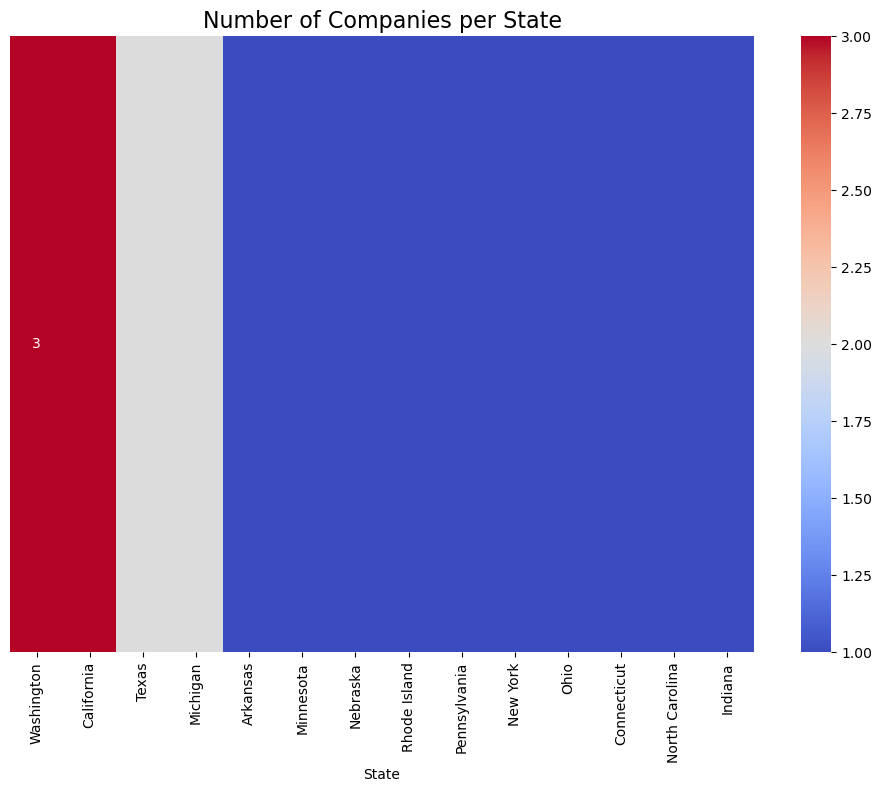

In [18]:
#Heatmap - Number of Companies per State
state_counts = df['State'].value_counts()
plt.figure(figsize=(12,8))
sns.heatmap(state_counts.to_frame().T, cmap='coolwarm', annot=True, fmt='d')
plt.title('Number of Companies per State', fontsize=16)
plt.yticks([])
plt.show()


WEB SCRAPING USING HTML5LIB

In [20]:
#installing required libraries
!pip install pandas requests html5lib

In [21]:
import requests
import pandas as pd
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Fortune_500"
# Fetching the page content
response = requests.get(url)
# Using pandas to read all tables on the page (html5lib will be used if installed)
tables = pd.read_html(response.text)
fortune_500_table = tables[0]
# Displaying the first few rows of the table
print(fortune_500_table.head())
fortune_500_table

   Rank             Company       State  \
0     1             Walmart    Arkansas   
1     2              Amazon  Washington   
2     3               Apple  California   
3     4  UnitedHealth Group   Minnesota   
4     5  Berkshire Hathaway    Nebraska   

                                   Industry  Revenue in USD  
0                     General merchandisers  $648.1 billion  
1           Internet services and retailing  $574.8 billion  
2               Computers, office equipment  $383.3 billion  
3   Health care: insurance and managed care  $371.6 billion  
4  Insurance: property and casualty (stock)  $364.5 billion  


C:\Users\akshaya reddy\AppData\Local\Temp\ipykernel_16808\3246239909.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


,Rank,Company,State,Industry,Revenue in USD
0,1,Walmart,Arkansas,General merchandisers,$648.1 billion
1,2,Amazon,Washington,Internet services and retailing,$574.8 billion
2,3,Apple,California,"Computers, office equipment",$383.3 billion
3,4,UnitedHealth Group,Minnesota,Health care: insurance and managed care,$371.6 billion
4,5,Berkshire Hathaway,Nebraska,Insurance: property and casualty (stock),$364.5 billion
5,6,CVS Health,Rhode Island,Health care: pharmacy and other services,$357.8 billion
6,7,ExxonMobil,Texas,Petroleum refining,$344.6 billion
7,8,Alphabet Inc.,California,Internet services and retailing,$307.4 billion
8,9,McKesson Corporation,Texas,Wholesalers: health care,$276.7 billion
9,10,Cencora,Pennsylvania,Wholesalers: health care,$262.2 billion


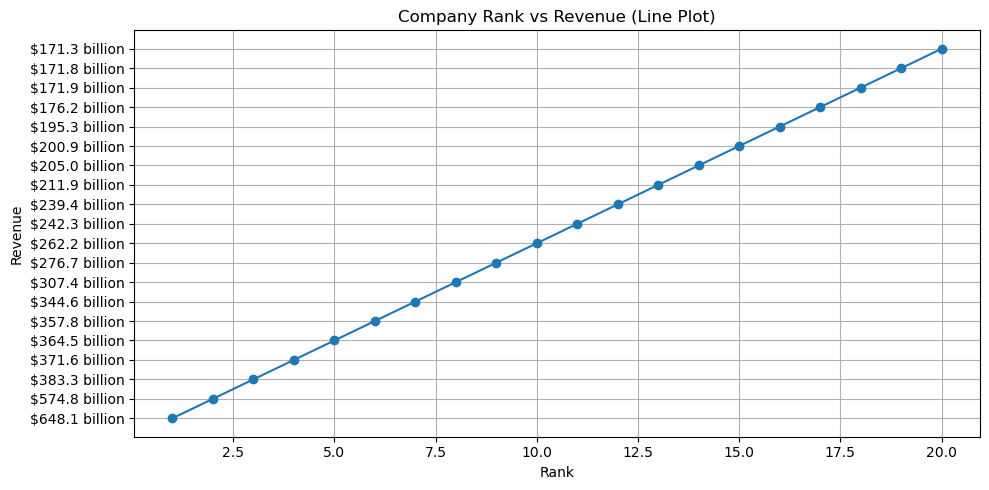

In [22]:
# --- LINE PLOT ---
plt.figure(figsize=(10, 5))
plt.plot(fortune_500_table['Rank'], fortune_500_table['Revenue in USD'], marker='o')
plt.title('Company Rank vs Revenue (Line Plot)')
plt.xlabel('Rank')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

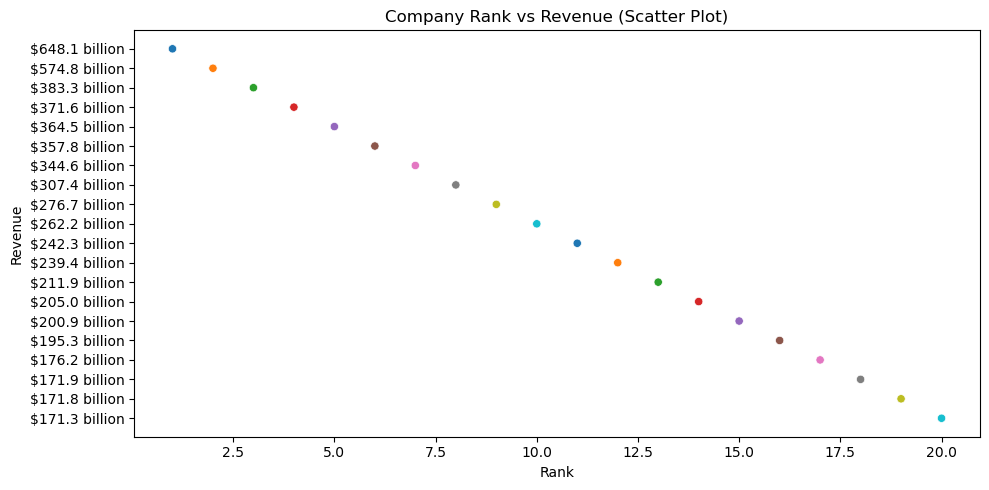

In [23]:
# --- SEABORN SCATTER PLOT ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rank', y='Revenue in USD', data=fortune_500_table, hue='Company', legend=False, palette='tab10')
plt.title('Company Rank vs Revenue (Scatter Plot)')
plt.xlabel('Rank')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [24]:
#Converting dataframe into json
fortune_500_table.to_json('fortune_500.json', orient='records')

In [25]:
fortune_500_table_2 = tables[1]
fortune_500_table_2

,Rank,State,Companies
0,1,California,57
1,2,New York,52
2,2,Texas,52
3,4,Illinois,32
4,5,Ohio,27
5,6,Virginia,24
6,7,Florida,22
7,8,Pennsylvania,20
8,9,Georgia,18
9,10,Minnesota,17


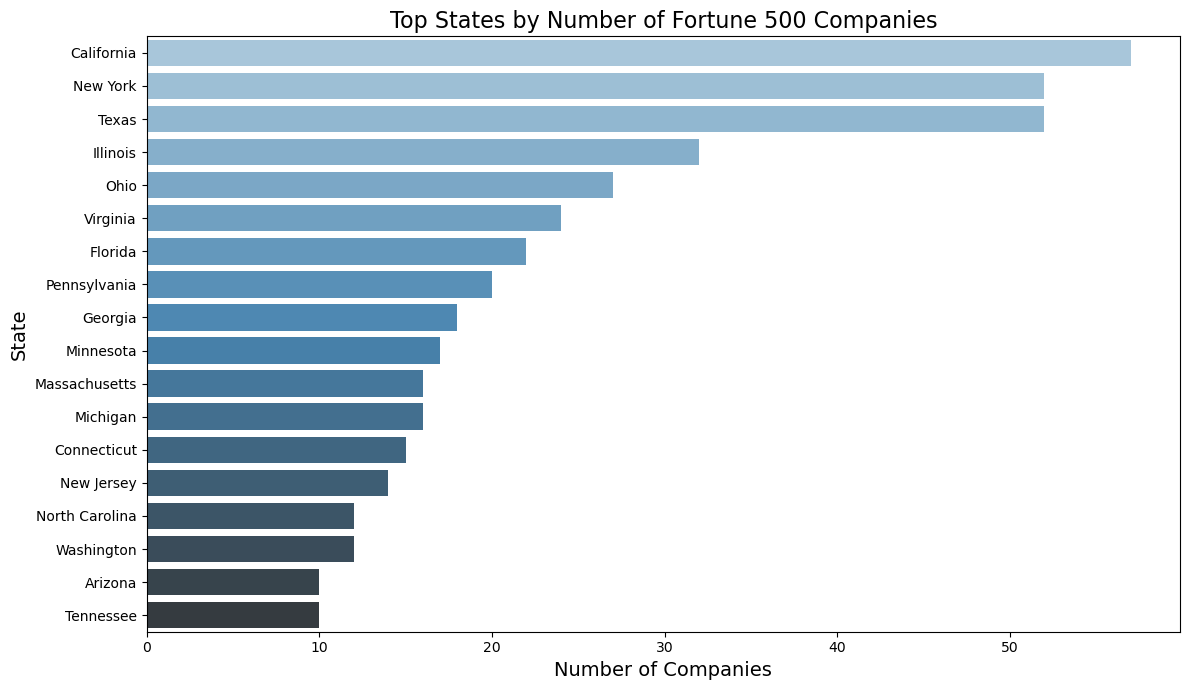

In [26]:
# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Companies', y='State', data=fortune_500_table_2, palette='Blues_d')
plt.title('Top States by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()